# SVR

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DailyTemps.csv to DailyTemps.csv


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
data = pd.read_csv('DailyTemps.csv')
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [ ]:
# Keep a certain number of samples
num_samples_to_keep = 150 # 100 - 1000 (pilih rentang 100 - 1000)

In [ ]:
# Dropping columns '['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset']'
df = data.drop(columns=['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset'])

# Renaming columns '['DATE', 'AvgTemp']'
new_column_names = {'DATE': 'Date', 'AvgTemp': 'Temp'}
df.rename(columns=new_column_names, inplace=True)

# Converting 'DATE' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df

,Date,Temp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0
...,...,...
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0


In [ ]:
# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,Date,Temp
0,2015-07-10,48.0
1,2018-10-11,46.0
2,2014-10-25,49.0
3,2016-01-04,45.0
4,2016-06-29,46.0
...,...,...
1820,2017-02-04,43.0
1821,2017-07-18,47.0
1822,2016-05-10,43.0
1823,2017-12-30,44.0


In [ ]:
sample_df = shuffled_df[:num_samples_to_keep]
sample_df

,Date,Temp
0,2015-07-10,48.0
1,2018-10-11,46.0
2,2014-10-25,49.0
3,2016-01-04,45.0
4,2016-06-29,46.0
...,...,...
195,2015-04-17,42.0
196,2015-01-17,48.0
197,2017-09-09,45.0
198,2016-10-04,46.0


In [ ]:
# Splitting features and target variable
sample_df['Day'] = sample_df['Date'].dt.day
sample_df['Month'] = sample_df['Date'].dt.month
sample_df['Year'] = sample_df['Date'].dt.year

clean_df = sample_df.dropna()
features = ['Day', 'Month', 'Year']
clean_df

<ipython-input-74-64c7b9ed131d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Day'] = sample_df['Date'].dt.day
<ipython-input-74-64c7b9ed131d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Month'] = sample_df['Date'].dt.month
<ipython-input-74-64c7b9ed131d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Date,Temp,Year,Month,Day
0,2015-07-10,48.0,2015,7,10
1,2018-10-11,46.0,2018,10,11
2,2014-10-25,49.0,2014,10,25
3,2016-01-04,45.0,2016,1,4
4,2016-06-29,46.0,2016,6,29
...,...,...,...,...,...
195,2015-04-17,42.0,2015,4,17
196,2015-01-17,48.0,2015,1,17
197,2017-09-09,45.0,2017,9,9
198,2016-10-04,46.0,2016,10,4


In [ ]:
# Assuming 80-20 train-test split=
X_train, X_test, y_train, y_test = train_test_split(clean_df[features], clean_df['Temp'], test_size=0.2, random_state=42)
X_train

,Day,Month,Year
79,4,12,2016
197,9,9,2017
38,19,11,2014
24,26,10,2014
122,31,8,2015
...,...,...,...
106,8,7,2014
14,28,8,2014
92,24,11,2017
179,13,2,2015


In [ ]:
# Create SVR model
svr_model = SVR(kernel='rbf', degree=3, gamma=0.01, coef0=0.1, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [ ]:
# Fit the SVR model
svr_model.fit(X_train, y_train)

SVR(coef0=0.1, gamma=0.01)

In [ ]:
# Predict
y_pred = svr_model.predict(X_test)
print(y_pred)

[44.01549027 46.34089146 45.14909536 46.22447917 46.67787356 44.17338257
 46.93220072 44.53026845 46.63355575 47.55300718 47.14688971 47.38001626
 46.50973461 47.92477139 47.48186314 46.5362902  47.0954483  48.14025581
 46.57825175 48.15830219 46.39079868 43.79810862 44.59094159 46.38694115
 46.3197859  45.50490852 44.35396974 46.26407834 46.22814731 47.83277444
 48.43605491 48.10369322 48.43225542 46.18937413 48.32458555 44.38584615
 48.10571337 46.6580224  48.2058219  43.76985625]


In [ ]:
# Evaluate the model

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2score = r2_score(y_test, y_pred)

results = pd.DataFrame({'MAE':[MAE],'MSE': [MSE],'RMSE': [RMSE],'R² score': [r2score]})
results = results[['MAE', 'MSE', 'RMSE', 'R² score']]
results

,MAE,MSE,RMSE,R² score
0,2.803504,12.896178,3.591125,0.22982


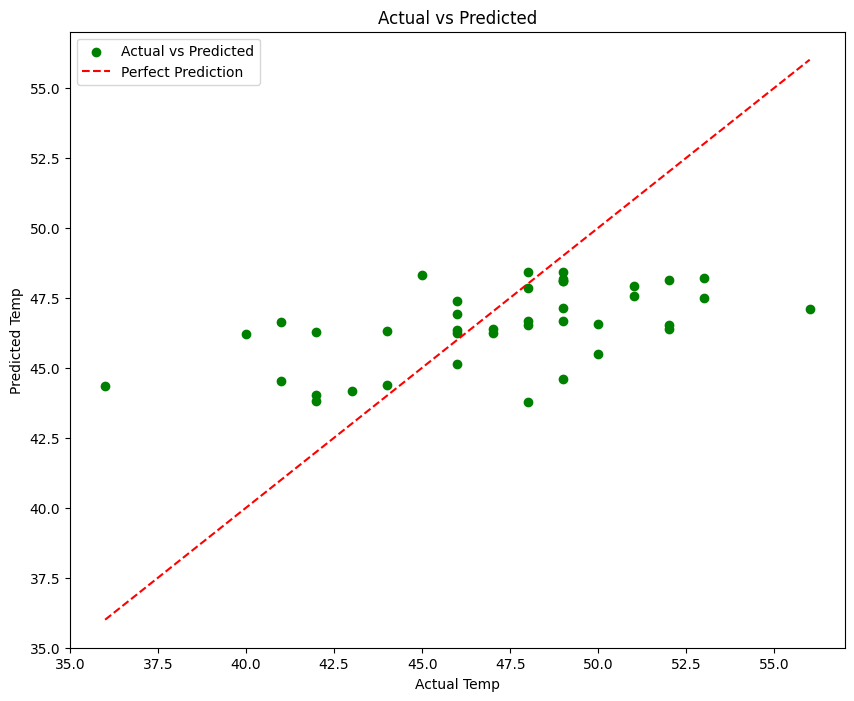

In [ ]:
# Plot the Actual vs Predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='green', label='Actual vs Predicted')

# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.legend()
plt.show()

# ARIMA

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pmdarima as pm

In [ ]:
# Load the dataset
data = pd.read_csv('DailyTemps.csv')
# Keep a certain number of samples
num_samples_to_keep = 150 # 100 - 1000 (pilih antara 100 hingga 1000)
data = data[:num_samples_to_keep]
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
145,5/26/2014,36.0,47.0,42.0,544,1855
146,5/27/2014,35.0,49.0,42.0,544,1855
147,5/28/2014,35.0,51.0,43.0,544,1856
148,5/29/2014,34.0,53.0,44.0,543,1856


In [ ]:
# Change to DateTime + index
df = data.drop(columns=['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset'])
# Renaming columns '['DATE', 'AvgTemp']'
df.rename(columns={'DATE': 'Date', 'AvgTemp': 'Temp'},inplace=True)
# Converting 'DATE' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.dropna(inplace=True)
df = df.set_index('Date')
df

,Temp
Date,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0
...,...
2014-05-26,42.0
2014-05-27,42.0
2014-05-28,43.0


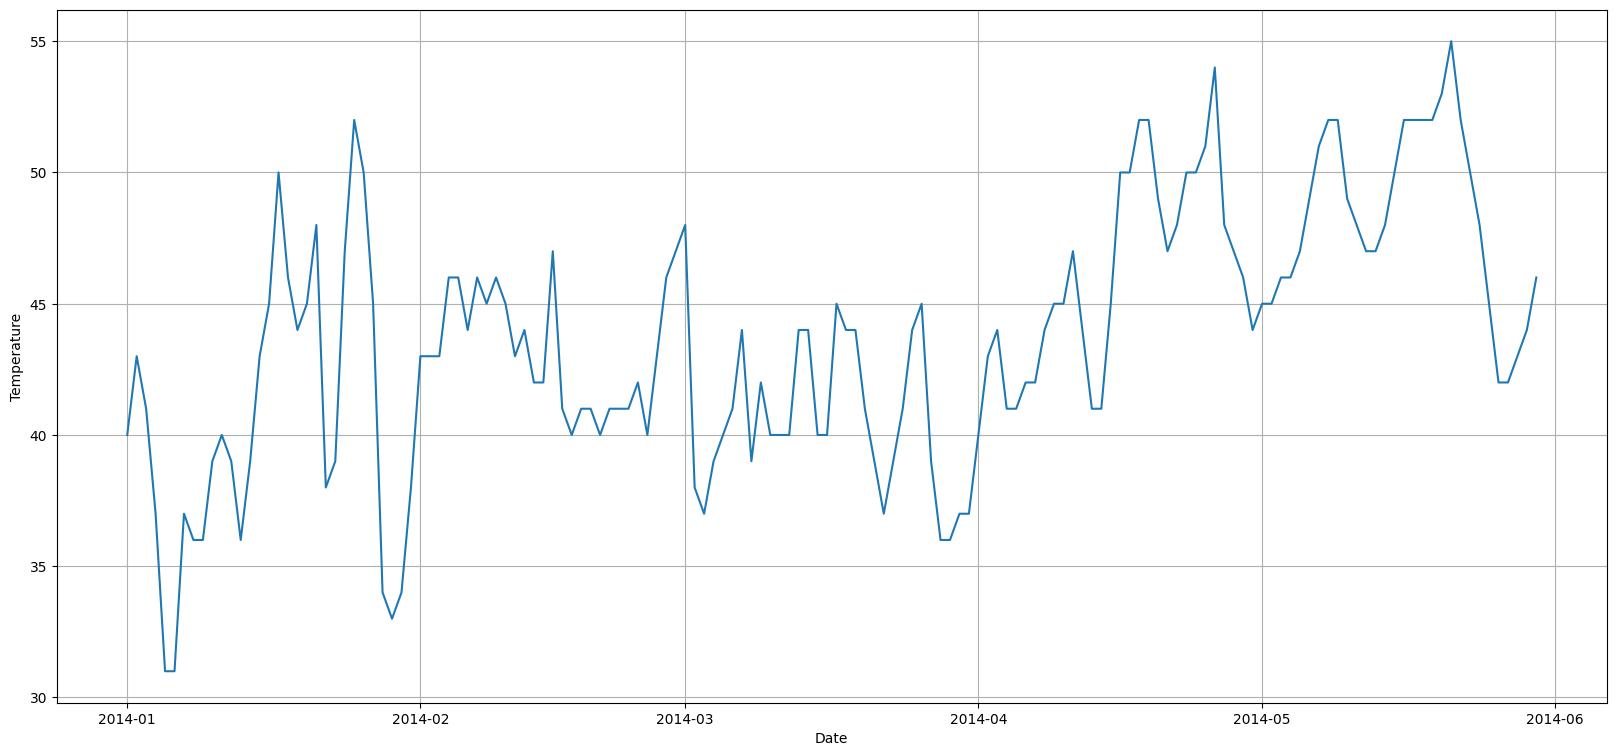

In [ ]:
# Plot the time series data
plt.figure(figsize=(20, 9))
plt.plot(df, label="Temperature")
plt.grid()
plt.xlabel('Date')
plt.ylabel("Temperature")
plt.show()

In [ ]:
# JANGAN DIGANTI
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, Data is non-stationary ")

In [ ]:
# ADF
adf_test(df['Temp'])

ADF Statistics: -2.7730341883700524
p- value: 0.06223007712632243
weak evidence against null hypothesis, Data is non-stationary 


In [ ]:
df_clean = df.dropna()
df_clean

,Temp
Date,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0
...,...
2014-05-26,42.0
2014-05-27,42.0
2014-05-28,43.0


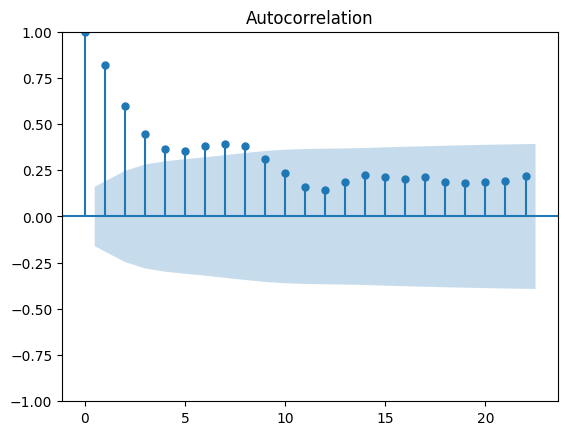

In [ ]:
# Plot ACF
acf = plot_acf(df['Temp'].dropna())

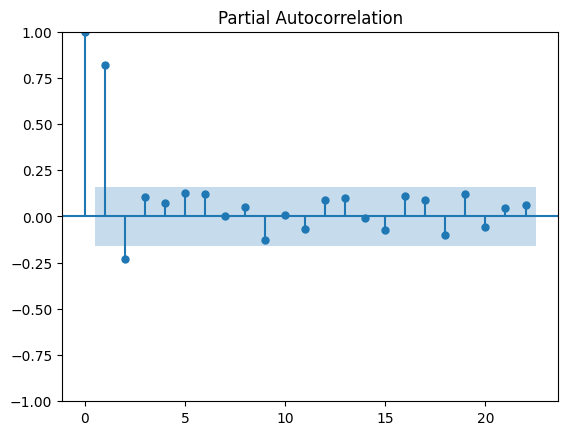

In [ ]:
# Plot PACF
pacf = plot_pacf(df['Temp'].dropna())

In [ ]:
# Split Dataset
train_len = int(len(df)*0.8)
train_data = df[0:train_len]
test_data = df[train_len:]

In [ ]:
# Inisialisasi tanggal awal dan akhir prediksi
pred_start_date = test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
# Inisialisasi Model ARIMA
model_ARIMA = ARIMA(df['Temp'],order=(30,0,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Train model ARIMA
model_Arima_fit=model_ARIMA.fit()

In [ ]:
# Summary Model ARIMA
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  149
Model:                ARIMA(30, 0, 0)   Log Likelihood                -342.012
Date:                Mon, 04 Dec 2023   AIC                            748.025
Time:                        13:39:45   BIC                            844.151
Sample:                             0   HQIC                           787.079
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0705      2.185     19.709      0.000      38.787      47.354
ar.L1          1.0386      0.112      9.309      0.000       0.820       1.257
ar.L2         -0.3598      0.139     -2.582      0.010      -0.633      -0.087
ar.L3          0.0403      0.138      0.292      0.770      -0.230       0.311
ar.L4          0.0286      0.154      0.186      0.853      -0.273       0.331
ar.L5         -0.0297      0.147     -0.202      0.840      -0.318       0.258
ar.L6          0.1694      0.132      1.283      0.199      -0.089       0.428
ar.L7         -0.0864      0.136     -0.634      0.526      -0.353       0.181
ar.L8          0.1550      0.159      0.976      0.329      -0.156       0.466
ar.L9         -0.1423      0.178     -0.798      0.425      -0.492       0.207
ar.L10         0.1694      0.148      1.146      0.252      -0.120       0.459
ar.L11        -0.2209      0.124     -1.783      0.075      -0.464       0.022
ar.L12         0.0486      0.135      0.361      0.718      -0.215       0.312
ar.L13         0.1136      0.163      0.695      0.487      -0.207       0.434
ar.L14         0.0495      0.151      0.329      0.742      -0.246       0.345
ar.L15        -0.1603      0.148     -1.082      0.279      -0.451       0.130
ar.L16         0.0063      0.151      0.042      0.967      -0.290       0.302
ar.L17         0.1838      0.165      1.115      0.265      -0.139       0.507
ar.L18        -0.2059      0.153     -1.344      0.179      -0.506       0.094
ar.L19         0.1788      0.140      1.281      0.200      -0.095       0.452
ar.L20        -0.0456      0.162     -0.282      0.778      -0.363       0.272
ar.L21        -0.0578      0.153     -0.378      0.705      -0.357       0.242
ar.L22         0.1347      0.163      0.829      0.407      -0.184       0.453
ar.L23        -0.0116      0.147     -0.079      0.937      -0.299       0.276
ar.L24        -0.0133      0.167     -0.080      0.936      -0.340       0.313
ar.L25         0.1425      0.175      0.816      0.414      -0.200       0.485
ar.L26        -0.2007      0.185     -1.086      0.277      -0.563       0.161
ar.L27        -0.0193      0.226     -0.085      0.932      -0.462       0.423
ar.L28         0.0976      0.183      0.533      0.594      -0.261       0.456
ar.L29        -0.0901      0.160     -0.562      0.574      -0.405       0.224
ar.L30        -0.0279      0.119     -0.234      0.815      -0.262       0.206
sigma2         5.5794      0.850      6.568      0.000       3.914       7.244
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.57
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.51   Skew:                            -0.50
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.60
========================================================

In [ ]:
# Lakukan Prediksi
predict = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
# Simpan Prediksi di dataFrame
test_data['Pred_Arima'] = predict
test_data

<ipython-input-264-975bce079008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred_Arima'] = predict


,Temp,Pred_Arima
Date,,
2014-04-30,44.0,46.653606
2014-05-01,45.0,44.791832
2014-05-02,45.0,46.907357
2014-05-03,46.0,45.877357
2014-05-04,46.0,46.198572
2014-05-05,47.0,45.603038
2014-05-06,49.0,47.601078
2014-05-07,51.0,47.156060
2014-05-08,52.0,50.146396


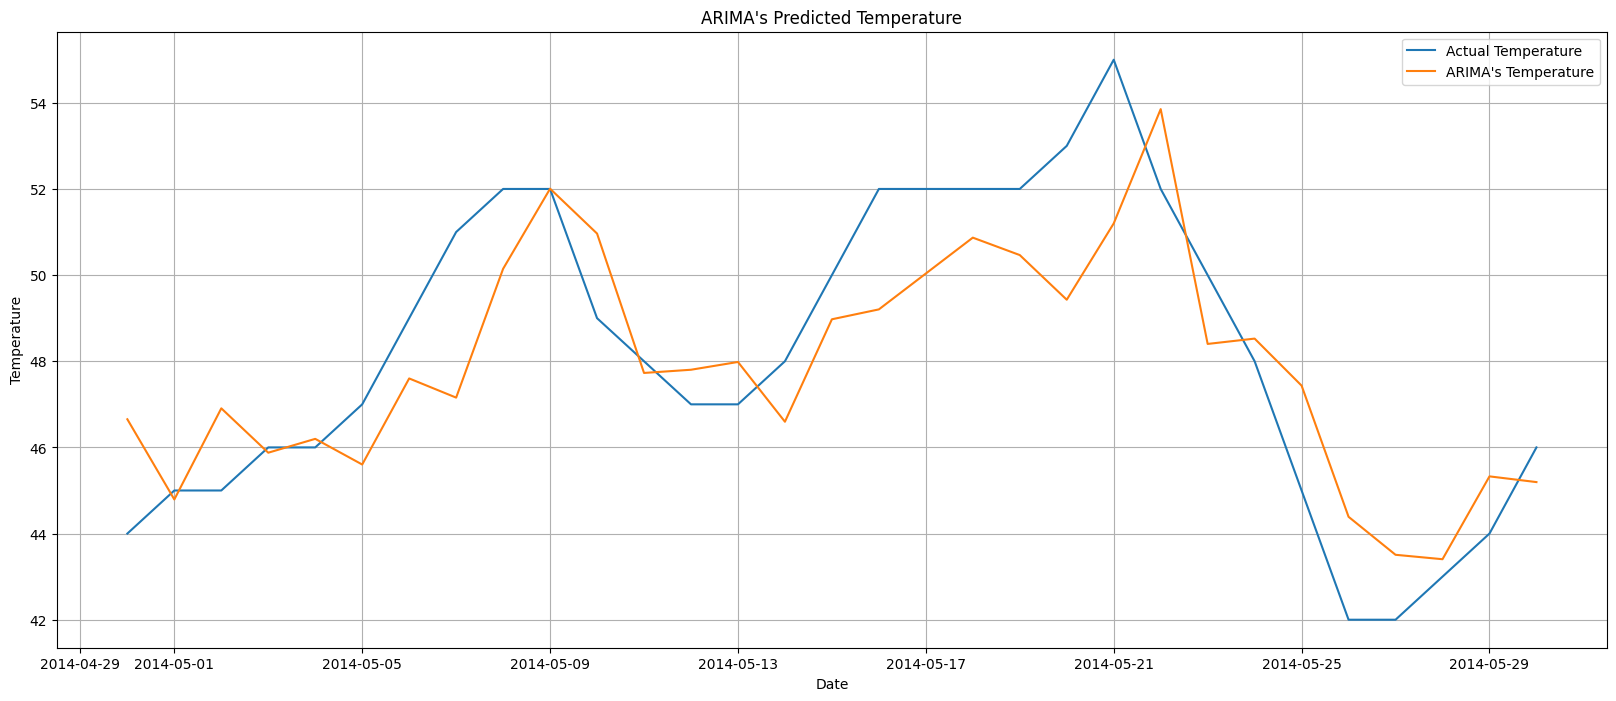

In [ ]:
# Plot Perbandingan ARIMA dan Actual Data
plt.figure(figsize=(20,8))
plt.plot(test_data["Temp"],label="Actual Temperature")
plt.plot(test_data["Pred_Arima"], label = "ARIMA's Temperature")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("ARIMA's Predicted Temperature")
plt.show()

In [ ]:
# MAPE
from sklearn.metrics import mean_squared_error
mape_pmd_arima  = np.round(np.mean(np.abs(test_data['Temp']- test_data['Pred_Arima'])/test_data['Temp'])*100,2)

results = pd.DataFrame({'MAPE': [mape_pmd_arima ]})
results = results[['MAPE']]
results

,MAPE
0,3.14


In [ ]:
# RMSE
rmse_pmd_arima = np.sqrt(mean_squared_error(test_data['Temp'], test_data['Pred_Arima'])).round(2)

results = pd.DataFrame({'RMSE': [rmse_pmd_arima]})
results = results[['RMSE']]
results

,RMSE
0,1.85
